In [1]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# OscFit path
sys.path.append('/home/jpyanez/projects/rpp-kenclark/jpyanez/oscfit_code/oscfit_dragon/modules')

In [3]:
import dataLoader, oscFit
reload(dataLoader)
import MCEqFlux

In [4]:
user = 'kpi_user_v1'
pid_array = np.array([-3, 2., np.inf])
sky_start = -1
sky_stop = 1
bins = 9

In [5]:
loader =  dataLoader.dataLoader(bin_edges   = [10**np.linspace(0.75,2.15,11),
                                               np.arccos(np.linspace(sky_start,sky_stop,bins))[::-1],
                                               pid_array],
                                    observables = ['reco_energy', 'reco_zenith', 'delta_llh'],
                                    user = user,
                                    LEaxis = [],
                                    bkg_diff_is_syst = True,
                                    #user_init = [0],
                                    expected_years = 3,
                                    weight_keys = ['weight_e', 'weight_mu'],
                                    detsys_perflavor=False, # Calculate the detector variations per flavor
                                    legacy_detsys = False, # Calcualte the detector variations as in the PRD paper
                                    detailed_detsys=False, # Re-calculate the detector variations at each minimization step
                                    verbose = False)


 ************************************ 
 **** oscFit3D v1.0 - dataLoader ****
 ************************************
dataLoader: Initializing user kpi_user_v1


/home/jpyanez/projects/rpp-kenclark/jpyanez/oscfit_code/oscfit_dragon/modules/dataLoader.py:45: RuntimeWarning: divide by zero encountered in divide
  in_dict['LE'] = np.log10(propagationDistance(in_dict['reco_zenith'])/in_dict['reco_energy'])


dataLoader: MC loaded successfully!
dataLoader: Setting MCEq fluxes for all mc sets, including systematic variations
List of files used for atmmu_data estimation (with weight of 1):
 + /project/6033576/jpyanez/dragon_data/pckl_old/Level6.0000.data_bkg2.IC86_2.11082016.pckl
 + /project/6033576/jpyanez/dragon_data/pckl_old/Level6.0000.data_bkg2.IC86_3.11082016.pckl
 + /project/6033576/jpyanez/dragon_data/pckl_old/Level6.0000.data_bkg2.IC86_4.11082016.pckl
List of files used for atmmu_new_data estimation (with weight of 1):
 + /project/6033576/jpyanez/dragon_data/pckl_old/Level6.0000.data_bkg1.IC86_2.11082016.pckl
 + /project/6033576/jpyanez/dragon_data/pckl_old/Level6.0000.data_bkg1.IC86_3.11082016.pckl
 + /project/6033576/jpyanez/dragon_data/pckl_old/Level6.0000.data_bkg1.IC86_4.11082016.pckl
dataLoader: Muon background templates loaded successfully!
dataLoader: Loading systematic variations using default values.


/home/jpyanez/projects/rpp-kenclark/jpyanez/oscfit_code/oscfit_dragon/modules/systematicFunctions.py:46: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yvalues_bin = np.array(y_values[[[x]for x in one_index]][0])
/home/jpyanez/projects/rpp-kenclark/jpyanez/oscfit_code/oscfit_dragon/modules/systematicFunctions.py:47: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  werrors     = np.sqrt(np.array(y_valuesw2[[[x]for x in one_index]][0]))/yvalues_bin


In [29]:
loader.nue['baseline']['CC']['ma_res'].sum(axis=0).shape

(2,)

In [7]:
print 'DONE'


DONE


In [10]:
livetime = loader.sec2years*2.8

In [11]:
import oscFit
reload(oscFit)

<module 'oscFit' from '/home/jpyanez/projects/rpp-kenclark/jpyanez/oscfit_code/oscfit_dragon/modules/oscFit.pyc'>

In [12]:
norm_atmmu = 1.5
ref = loader.loadMCasData({'norm_nu':2.9,
                          'norm_atmmu':norm_atmmu,
                          'oscMode':'TwoNeutrino'})
tot_events = np.sum(ref)
print 'Events in pseudo-data sample', np.sum(ref)

dataLoader: atmmu_norm  1.5 , noise_norm 1.0
Events in pseudo-data sample 45693.5762832064


In [13]:
ini_fraction = loader.atmmu_histo['data'].sum()*norm_atmmu/tot_events
print ini_fraction

0.08082098842758507


In [14]:
fitter = oscFit.fitOscParams()
data_loaders    = [loader]          # Here you could list many samples to be fit at once
data_histograms = [ref]  # The data histogram for each of the samples


 ************************************ 
 ****** oscFit3D v1.0 - oscFit ******
 ************************************


In [15]:
# The settings of the fit are given as [ini_value, fix?]
fit_settings    = {
    'simulation':     'baseline',      # This patches GENIE simulation with NuGen.
    'dm31':           [0.0025, False, 'NH'], # Need to specify the hierarchy of the fit
    'theta23':        [0.76, False],         # Not used in the "TwoNeutrino" mode
    'theta13':        [0.148, True],        # Not used in the "TwoNeutrino" mode
    'mix_angle':      [0.97, False, 1.4],     # Only used in the "TwoNeutrino" mode. Leave as is otherwise.
    'oscMode':        'TwoNeutrino',         # How do you want to fit the data?
    'oscTables':      False,
    'norm':           [1.0, False],
    'norm_e':         [1., True],
    'norm_tau':       [1., True],            # Set to false for nutau apperance studies
    'nu_nubar':       [1., True],
    'nubar_ratio':     [0., True],
    'uphor_ratio':    [0., True],

    'gamma':          [0.00, False],
    # New parameters
    'w_pi':           [0.00, True],
    'w_k':            [0.02, False],
    
    
    'axm_qe':         [0., True],
    'axm_res':        [0., False],
    'pid_bias':       [0., True], #Highly experimental
    'hole_ice':       [0.02, True],
    'hi_fwd':         [0.0, True],

    'norm_nc':        [1., False],
    'domeff':         [1., True],
    'had_escale':     [1., True], # Highly experimental
    'atmmu_f':        [0.07, False, 'data'],
    'noise_f':        [0.0, True],
#    'fix_norm_region':[1.7],
    'detector_syst':  False,
    'include_priors': True,
    'printMode':      -1}                  # Do you want to see every step MINUIT takes?

In [16]:
result_NH = fitter(data_histograms=data_histograms,
                data_loaders=data_loaders,
                fit_settings=fit_settings,
                #fit_priors = fit_priors,
                ncalls = 1000,
                do_chi2_fit = True,
                store_fit_details = True)

oscFit: Fitter running in TwoNeutrino mode
oscFit: 45693.5762832064  events in data
oscFit: Fitting in normal hierarchy mode
37.92937
oscFit: Testing the LLH2 function  37.92936901389657
Baseline LLH value given in settings:  0.0
oscFit: Fit settings
	noise_f 	[0.0, True]
	pid_bias 	[0.0, True]
	deltacp 	[0.0, True]
	hi_fwd 	[0.0, True]
	printMode 	-1
	oscMode 	TwoNeutrino
	include_priors 	True
	theta24 	[0.0, True]
	atmmu_f 	[0.07, False, 'data']
	w_k 	[0.02, False]
	theta23 	[0.76, False]
	uphor_ratio 	[0.0, True]
	detector_syst 	False
	theta34 	[0.0, True]
	w_pi 	[0.0, True]
	norm 	[1.0, False]
	axm_res 	[0.0, False]
	norm_tau 	[1.0, True]
	oscTables 	False
	nubar_ratio 	[0.0, True]
	dm41 	[0.0, True]
	norm_nc 	[1.0, False]
	domeff 	[1.0, True]
	hole_ice 	[0.02, True]
	dm31 	[0.0025, False, 'NH']
	nu_nubar 	[1.0, True]
	baseline_llh 	[0.0, True]
	had_escale 	[1.0, True]
	dm21 	[7.53e-05, True]
	mix_angle 	[0.97, False, 1.4]
	simulation 	baseline
	norm_e 	[1.0, True]
	axm_qe 	[0.0, T

25.84317  +0.00264  +0.90338  +0.99946  +0.00031  +0.20582  +0.07589  +0.01229  +1.07043
25.84286  +0.00264  +0.90338  +0.99946  +0.00033  +0.20613  +0.07589  +0.01229  +1.07043
25.84405  +0.00264  +0.90338  +0.99946  +0.00033  +0.20551  +0.07589  +0.01229  +1.07043
25.84374  +0.00264  +0.90338  +0.99946  +0.00033  +0.20582  +0.07590  +0.01229  +1.07043
25.84318  +0.00264  +0.90338  +0.99946  +0.00033  +0.20582  +0.07588  +0.01229  +1.07043
25.84334  +0.00264  +0.90338  +0.99946  +0.00033  +0.20582  +0.07589  +0.01310  +1.07043
25.84358  +0.00264  +0.90338  +0.99946  +0.00033  +0.20582  +0.07589  +0.01148  +1.07043
25.84319  +0.00264  +0.90338  +0.99946  +0.00033  +0.20582  +0.07589  +0.01229  +1.07066
25.84372  +0.00264  +0.90338  +0.99946  +0.00033  +0.20582  +0.07589  +0.01229  +1.07020
25.79603  +0.00263  +0.90299  +0.99982  -0.00031  +0.21889  +0.07591  +0.02474  +1.07391
25.77690  +0.00262  +0.90255  +1.00024  -0.00104  +0.23396  +0.07594  +0.03912  +1.07794
25.77669  +0.00262  +

25.68664  +0.00262  +0.90828  +0.99980  -0.00768  +0.29740  +0.07537  -0.08476  +1.07539
25.68664  +0.00262  +0.90828  +0.99980  -0.00768  +0.29740  +0.07535  -0.08476  +1.07539
25.68665  +0.00262  +0.90828  +0.99980  -0.00768  +0.29740  +0.07536  -0.08395  +1.07539
25.68663  +0.00262  +0.90828  +0.99980  -0.00768  +0.29740  +0.07536  -0.08557  +1.07539
25.68663  +0.00262  +0.90828  +0.99980  -0.00768  +0.29740  +0.07536  -0.08476  +1.07562
25.68666  +0.00262  +0.90828  +0.99980  -0.00768  +0.29740  +0.07536  -0.08476  +1.07516
25.68662  +0.00262  +0.90827  +0.99980  -0.00768  +0.29751  +0.07536  -0.08467  +1.07558
25.68662  +0.00262  +0.90827  +0.99980  -0.00768  +0.29752  +0.07536  -0.08466  +1.07560
25.68663  +0.00262  +0.90827  +0.99980  -0.00768  +0.29752  +0.07536  -0.08466  +1.07560
25.68663  +0.00262  +0.90827  +0.99980  -0.00768  +0.29752  +0.07536  -0.08466  +1.07560
25.68663  +0.00262  +0.90834  +0.99980  -0.00768  +0.29752  +0.07536  -0.08466  +1.07560
25.68663  +0.00262  +

25.68669  +0.00262  +0.90805  +0.99980  -0.00768  +0.29752  +0.07536  -0.08466  +1.07560
25.68663  +0.00262  +0.90834  +0.99980  -0.00768  +0.29752  +0.07536  -0.08466  +1.07560
25.68663  +0.00262  +0.90821  +0.99980  -0.00768  +0.29752  +0.07536  -0.08466  +1.07560
25.68667  +0.00262  +0.90827  +0.99983  -0.00768  +0.29752  +0.07536  -0.08466  +1.07560
25.68667  +0.00262  +0.90827  +0.99976  -0.00768  +0.29752  +0.07536  -0.08466  +1.07560
25.68663  +0.00262  +0.90827  +0.99981  -0.00768  +0.29752  +0.07536  -0.08466  +1.07560
25.68663  +0.00262  +0.90827  +0.99978  -0.00768  +0.29752  +0.07536  -0.08466  +1.07560
25.68716  +0.00262  +0.90827  +0.99980  -0.00749  +0.29752  +0.07536  -0.08466  +1.07560
25.68717  +0.00262  +0.90827  +0.99980  -0.00786  +0.29752  +0.07536  -0.08466  +1.07560
25.68663  +0.00262  +0.90827  +0.99980  -0.00766  +0.29752  +0.07536  -0.08466  +1.07560
25.68663  +0.00262  +0.90827  +0.99980  -0.00770  +0.29752  +0.07536  -0.08466  +1.07560
25.68682  +0.00262  +


oscFit: Loader  0  nonzero bins:  160
oscFit: Total nonzero bins:  160

 **** oscFit3D results ****
add_detector_systematics 	False
atmmu_f 	0.0753594403113 	0.00369152949602
atmmu_template 	data
axm_qe 	0.0 	0.5
axm_res 	-0.0846584622499 	0.598650700293
baseline_llh 	0.0 	1.0
chi_squared 	30.89736736145025
chi_squared_expstat 	25.53069589561181
chi_squared_prior 	31.053294338944966
chi_squared_prior_expstat 	25.686622873106526
deltacp 	0.0 	0.001
dm21 	7.53e-05 	0.001
dm31 	0.00262362590962 	7.70216814122e-05
dm41 	0.0 	1.0
domeff 	1.0 	0.02
expected_events 	[45693.5762832064]
expected_events_mc 	[45684.30024555046]
gamma 	-0.00767564791906 	0.0188563785132
had_escale 	1.0 	0.03
hesse_errors 	True
hi_fwd 	0.0 	0.01
hole_ice 	0.02 	0.001
llh 	25.6866228731
log_likelihood 	-224616.9152069
min_routine 	migrad
mix_angle 	0.908272094932 	0.0225009160385
noise_f 	0.0 	0.01
nonzero_bins 	160
norm 	0.999796994711 	0.0037010332011
norm_atmmu 	1.3983522735645633
norm_e 	1.0 	0.05
norm_nc 	1.07

In [17]:
print 'DONE'

DONE


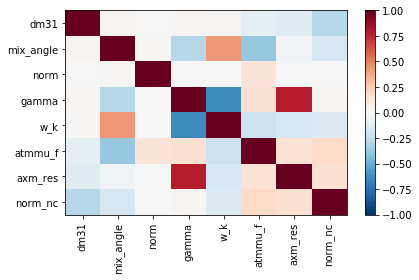

In [18]:
params = []
for param in result_NH["parameters"]:
    if not result_NH["fit_settings"][param][1]:
        params.append(param)
ticks = range(0,len(params))
fig, ax = plt.subplots()
im = ax.imshow(np.transpose(result_NH["corr_matrix"]),cmap='RdBu_r', aspect='auto', interpolation='none', vmin=-1.0, vmax=1.0)
fig.colorbar(im, ax=ax)
ax.grid(False)
ax.set_yticks(ticks)
ax.set_xticks(ticks)
ax.set_xticklabels(params)
ax.set_yticklabels(params)
plt.xticks(rotation=90)
#x0, x1, y0, y1 = plt.axis()
#plt.axis((x0+3.0,x1+3.0, y0, y1))
fig.tight_layout()